## Mallet-TM : 
### Extract Topic Model with LdaMallet from KCC News and CIS test data

In [1]:
# -*- coding: utf-8 -*-
"""
Input: "KCC Data/CkipNewsCisTest-KccDict2020.txt"
Output: "KCC Data/NewsCisTest-KccDict2020-MalletNum20.txt"

@author: johnson
"""
from gensim import corpora, models, utils
from gensim.models import LdaModel
from gensim.models import CoherenceModel

### read data from txt file, and tokenize words, clean-up text

In [2]:
fList = []
with open("Ly Data/su_ws.txt","r", encoding='utf-8-sig') as files:
     for file in files:
        #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
        fList.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
print("fList[:1] = ", fList[:1])
print("------------------------------")

fList[:1] =  [['委員', '巧慧', '行政院', '院長', '副院長', '部會', '首長', '同仁', '院長', '上任', '接受', '媒體', '採訪', '立院', '質詢', '進黨', '立委', '自走砲', '善意', '溝通', '相互', '尊重', '院長', '在意', '善意', '溝通', '尊重', '正式', '質詢', '聲明', '立法委員', '監督', '行政院', '職責', '身為', '民意代表', '立場', '態度', '人物', '價值', '判斷', '職責', '態度', '價值', '標準', '質詢', '院長', '質詢', '新任', '閣揆', '標準', '因人而異', '院長', '標準', '態度', '善意', '尊重', '行政院', '院長', '答復', '院長', '善政', '委員', '委員', '巧慧', '院長', '辛苦', '質詢', '態度', '行政院', '委員', '詢問', '標準', '院長', '隨意', '院長', '善政', '暫時', '不用', '委員', '巧慧', '言歸正傳', '院長', '就任', '就職', '當天', '領導', '內閣', '第一', '任期', '內閣', '壓力', '內閣', '打造', '政權', '移轉', '交接', '典範', '當作', '目標', '過渡', '看守', '定位', '內閣', '院長', '轉述', '正確', '院長', '善政', '委員', '巧慧', '院長', '定位', '認同', '質詢', '面對', '任期', '處於', '歷史', '定位', '院長', '善政', '委員', '巧慧', '定位', '內閣', '質詢', '值得', '關注', '院長', '領導', '內閣', '責無旁貸', '確實', '院長', '提出', '做好', '移轉', '交接', '主題', '討論', '院長', '一再', '政府', '存續', '新舊', '政府', '交接', '理念', '超越', '財產', '人事', '清冊', '層次', '實質', '交接', '政府', '內涵', '深度', '交接', '口頭', '報告

### creat dictionary for corpus

In [3]:
# creat a unique id for each word segment
dict = corpora.Dictionary(list(fList))
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(13774 unique tokens: ['gdp', 'ids', '一五一十', '一再', '一點']...)
------------------------------


### creat corpus need for Topic Modeling

In [4]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(text) for text in fList]   
print("corpus[:1] = ", corpus[:1])  
print("================================================")

print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("======================================================")

corpus[:1] =  [[(0, 9), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 6), (17, 6), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 19), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 5), (36, 3), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 3), (51, 2), (52, 1), (53, 1), (54, 6), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 20), (61, 1), (62, 2), (63, 1), (64, 2), (65, 3), (66, 2), (67, 2), (68, 2), (69, 3), (70, 2), (71, 2), (72, 1), (73, 1), (74, 1), (75, 9), (76, 4), (77, 2), (78, 1), (79, 1), (80, 8), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 2), (90, 2), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 3), (97, 5), (98, 1), (99, 1), (100, 1), (101, 1), (102, 2), (103, 1), (104, 2), (105, 1), (106, 1), (107, 1), (108, 2), (1

### building the Topic Model from MALLET
#### enviroment setting for Mallet LDA: https://programminghistorian.org/en/lessons/topic-modeling-and-mallet#installing-mallet

In [8]:
mallet_path = "/users/twcty/Desktop/mallet-2.0.8/bin/mallet"
ldamal = models.wrappers.LdaMallet(mallet_path, corpus=corpus, id2word=dict, num_topics=20)
output = open("Ly Data/su_ws.txt", 'w', encoding='utf-8-sig')

#print(ldamal.show_topics(formatted=False))
# 列出最重要的前若干个主题
lsTM = ldamal.show_topics(num_topics=20, num_words=20, log=False, formatted=False)
for tupleTM in lsTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1)
        output.write(str1)
output.close()
 
#  print("------------------------------")
#  print("Perplexity = ", ldamal.log_perplexity(corpus))

print("------------------------------")
cm = models.CoherenceModel(model=ldamal, texts=list(fList), dictionary= dict, coherence= 'c_v')
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda)


strTM =  0[('委員', 0.06543647977288858), ('主任委員', 0.06259758694109298), ('巧慧', 0.05663591199432221), ('曉星', 0.04769339957416607), ('主委', 0.03520227111426544), ('原能會', 0.01674946770759404), ('核能', 0.01391057487579844), ('台電', 0.010361958836053939), ('告訴', 0.01022001419446416), ('狀況', 0.009652235628105039), ('請問', 0.00837473385379702), ('最終', 0.00809084457061746), ('辦法', 0.00794889992902768), ('相關', 0.0075230660042583395), ('家園', 0.007239176721078779), ('非核', 0.00695528743789922), ('時間', 0.006671398154719659), ('核四', 0.006671398154719659), ('審查', 0.006671398154719659), ('完成', 0.005961674946770759)]

strTM =  1[('部長', 0.2898410747212222), ('委員', 0.08069189568882255), ('巧慧', 0.05637018175432435), ('計畫', 0.028360698920010537), ('補助', 0.021248573184651856), ('時間', 0.012994995170778822), ('討論', 0.01290719114935464), ('政策', 0.012380367020809553), ('裡面', 0.010273070506629204), ('期待', 0.009482834313811573), ('發展', 0.008077969971024673), ('執行', 0.007287733778207042), ('要點', 0.007024321713934498), 


 Coherence Score:  0.43493520829847476


### Finding the optimal number of topics

In [9]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    # global mallet_path, dict
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dict)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        coher = coherencemodel.get_coherence()
        print("Num_topics: ", num_topics, " Coherence Score= ", coher)
    return model_list, coherence_values

In [10]:
lim=36; sta=3; ste=3;
model_list, coherence_values = compute_coherence_values(dictionary=dict, corpus=corpus, texts=list(fList), limit=lim, start=sta, step=ste)

Num_topics:  3  Coherence Score=  0.2732576378565789
Num_topics:  6  Coherence Score=  0.35149742847434484
Num_topics:  9  Coherence Score=  0.38488788610173547
Num_topics:  12  Coherence Score=  0.4187691487911595
Num_topics:  15  Coherence Score=  0.4283883483826342
Num_topics:  18  Coherence Score=  0.39860249247574103
Num_topics:  21  Coherence Score=  0.4337306579378227
Num_topics:  24  Coherence Score=  0.42304830225728907
Num_topics:  27  Coherence Score=  0.42090097021320894
Num_topics:  30  Coherence Score=  0.414907842861191
Num_topics:  33  Coherence Score=  0.4005023278928142


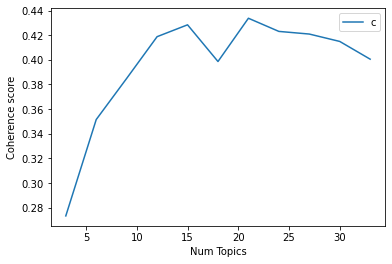

In [11]:
# Show graph
import matplotlib.pyplot as plt

limit=lim; start=sta; step=ste;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [12]:
# Print the coherence scores
optNum = 0
maxCV = 0
for m, cv in zip(x, coherence_values):
    # maxCV = lambda cv, maxCV: cv if cv > maxCV else maxCV
    if cv > maxCV:
        optNum = m
        maxCV = cv 
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("Optimal Topic Num =", optNum, " Highest Value =", maxCV)

Num Topics = 3  has Coherence Value of 0.2733
Num Topics = 6  has Coherence Value of 0.3515
Num Topics = 9  has Coherence Value of 0.3849
Num Topics = 12  has Coherence Value of 0.4188
Num Topics = 15  has Coherence Value of 0.4284
Num Topics = 18  has Coherence Value of 0.3986
Num Topics = 21  has Coherence Value of 0.4337
Num Topics = 24  has Coherence Value of 0.423
Num Topics = 27  has Coherence Value of 0.4209
Num Topics = 30  has Coherence Value of 0.4149
Num Topics = 33  has Coherence Value of 0.4005
Optimal Topic Num = 21  Highest Value = 0.4337306579378227


###  Select the model and print the topics

In [13]:
from pprint import pprint

optimal_model = model_list[5]
# model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=25))

[(0,
  '0.043*"委員" + 0.040*"巧慧" + 0.029*"學校" + 0.020*"教育部" + 0.017*"報告" + '
  '0.014*"政策" + 0.012*"計畫" + 0.011*"請問" + 0.011*"清華" + 0.011*"單位" + 0.011*"網站" '
  '+ 0.008*"平台" + 0.008*"資料" + 0.007*"執行" + 0.007*"營養午餐" + 0.007*"地方" + '
  '0.007*"推動" + 0.007*"青年" + 0.007*"部會" + 0.006*"辦公室" + 0.006*"成效" + '
  '0.006*"食材" + 0.006*"宣導" + 0.006*"學生" + 0.006*"真的"'),
 (1,
  '0.021*"討論" + 0.020*"基金" + 0.019*"提出" + 0.018*"本席" + 0.017*"修正" + 0.016*"條例" '
  '+ 0.015*"法律" + 0.015*"需要" + 0.014*"機關" + 0.013*"版本" + 0.013*"修法" + '
  '0.012*"相關" + 0.012*"第一" + 0.012*"設置" + 0.010*"政府" + 0.010*"草案" + 0.010*"工作" '
  '+ 0.010*"規範" + 0.009*"主管" + 0.009*"審查" + 0.009*"管理" + 0.009*"法規" + '
  '0.008*"中央" + 0.008*"目的" + 0.008*"條文"'),
 (2,
  '0.079*"署長" + 0.048*"委員" + 0.039*"巧慧" + 0.024*"體育" + 0.020*"選手" + 0.014*"德福" '
  '+ 0.014*"運動" + 0.013*"協會" + 0.012*"國家" + 0.011*"高署長" + 0.010*"俊雄" + '
  '0.010*"體育署" + 0.009*"辦法" + 0.009*"項目" + 0.009*"國民" + 0.009*"教練" + '
  '0.008*"本席" + 0.008*"參加" + 0.008*"剛剛" + 0.007*"第一" + 0.0

### Finding the dominant topic in each sentence

In [14]:
import pandas as pd

# Finding the dominant topic in each sentence
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamal, corpus=corpus, texts=list(fList))

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,18.0,0.4273,"報告, 委員, 巧慧, 資料, 真的, 數字, 政策, 提出, 提到, 數據","[委員, 巧慧, 行政院, 院長, 副院長, 部會, 首長, 同仁, 院長, 上任, 接受,..."
1,1,11.0,0.4904,"委員, 巧慧, 地方, 請問, 意見, 本席, 會議, 報告, 提出, 委員會","[委員, 巧慧, 列席, 官員, 同仁, 部長, 辛苦, 部長, 質詢, 部長, 短短, 分..."
2,2,14.0,0.2362,"教育部, 文忠, 委員, 教育, 教師, 老師, 討論, 學生, 學校, 大學","[委員, 巧慧, 列席, 官員, 同仁, 部長, 施政, 質詢, 政大, 野火, 事件, 恰..."
3,3,1.0,0.2429,"部長, 委員, 巧慧, 計畫, 補助, 時間, 討論, 政策, 裡面, 期待","[委員, 巧慧, 列席, 官員, 同仁, 部長, 報告, 我國, 科技, 發展, 貴部, 執..."
4,4,0.0,0.4881,"委員, 主任委員, 巧慧, 曉星, 主委, 原能會, 核能, 台電, 告訴, 狀況","[委員, 巧慧, 列席, 官員, 同仁, 可不可以, 主委, 國會, 殿堂, 大眾, 原能,..."
5,5,14.0,0.4411,"教育部, 文忠, 委員, 教育, 教師, 老師, 討論, 學生, 學校, 大學","[委員, 巧慧, 列席, 官員, 同仁, 確實, 臺灣, 高等, 教育, 憂心忡忡, 想法,..."
6,6,19.0,0.4190,"文化, 麗君, 文化部, 預算, 產業, 委員, 電影, 藝術, 國家, 支持","[委員, 巧慧, 列席, 官員, 同仁, 部長, 聽說, 喜歡, 電影, 剛剛, 口頭, 報..."
7,7,2.0,0.4661,"院長, 故宮, 博物館, 委員, 巧慧, 正儀, 文物, 南院, 展覽, 密察","[委員, 巧慧, 列席, 官員, 同仁, 院長, 資歷, 深厚, 故宮, 服務, 工作, 想..."
8,8,19.0,0.4054,"文化, 麗君, 文化部, 預算, 產業, 委員, 電影, 藝術, 國家, 支持","[委員, 巧慧, 列席, 官員, 同仁, 題目, 兩岸, 影視, 流行, 音樂, 交流, 困..."
9,9,11.0,0.5405,"委員, 巧慧, 地方, 請問, 意見, 本席, 會議, 報告, 提出, 委員會","[委員, 巧慧, 列席, 官員, 同仁, 今日, 會議, 邀請, 部長, 報告, 議題, 確..."


### Find the most representative document for each topic

In [15]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()
print("------------------------------")
sent_topics_sorteddf_mallet[:10]

------------------------------


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.7683,"委員, 主任委員, 巧慧, 曉星, 主委, 原能會, 核能, 台電, 告訴, 狀況","[委員, 巧慧, 列席, 官員, 同仁, 質詢, 想要, 嚴正, 聲明, 新北市, 代表, ..."
1,1.0,0.4908,"部長, 委員, 巧慧, 計畫, 補助, 時間, 討論, 政策, 裡面, 期待","[委員, 巧慧, 列席, 官員, 同仁, 文化部, 提供給, 本席, 資料, 國立, 中正紀..."
2,2.0,0.6604,"院長, 故宮, 博物館, 委員, 巧慧, 正儀, 文物, 南院, 展覽, 密察","[委員, 巧慧, 列席, 官員, 同仁, 預算, 詢答, 本席, 故宮, 業務, 借展, 策..."
3,3.0,0.5465,"教育部, 學校, 教育, 學生, 孩子, 文忠, 課綱, 大學, 學習, 高中","[委員, 巧慧, 列席, 官員, 同仁, 部長, 團體, 記者, 國會, 關鍵, 國會, 議..."
4,4.0,0.5663,"科技部, 良基, 委員, 產業, 科技, 計畫, 巧慧, 研究, 預算, 中心","[委員, 巧慧, 列席, 官員, 同仁, 題目, 貿易, 衝突, 政府, 協助, 台商, 返..."
5,5.0,0.6568,"署長, 委員, 巧慧, 體育, 選手, 德福, 運動, 協會, 高署長, 國家","[委員, 巧慧, 列席, 官員, 同仁, 質詢, 體育署, 署長, 棒球, 經典賽, 棒協,..."
6,6.0,0.6276,"委員, 地方, 建設, 巧慧, 縣市, 預算, 鶯歌, 前瞻, 樹林, 特別","[委員, 巧慧, 列席, 官員, 同仁, 主題, 自行, 旅遊, 鐵道, 觀光, 等於, 鐵..."
7,7.0,0.6158,"委員, 巧慧, 銘春, 勞動部, 工作, 申請, 勞工, 本席, 狀況, 就業","[委員, 巧慧, 列席, 官員, 同仁, 勞動部, 業務, 真的, 包海, 眼前, 需要, ..."
8,8.0,0.6467,"委員, 巧慧, 政府, 台灣, 中國, 行政院, 媒體, 自由, 監察院, 剛剛","[委員, 巧慧, 提名人, 同仁, 恭喜, 老師, 監委, 提名人, 提名人, 本席, 簡答..."
9,9.0,0.6847,"本席, 提出, 基金, 討論, 審查, 辦法, 相關, 制度, 預算, 機關","[委員, 巧慧, 列席, 官員, 同仁, 今日, 財政, 委員會, 排入, 本席, 擬具, ..."


###  Showing topic distribution across documents

In [16]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,18.0,"報告, 委員, 巧慧, 資料, 真的, 數字, 政策, 提出, 提到, 數據",17.0,0.0646
1.0,11.0,"委員, 巧慧, 地方, 請問, 意見, 本席, 會議, 報告, 提出, 委員會",4.0,0.0152
2.0,14.0,"教育部, 文忠, 委員, 教育, 教師, 老師, 討論, 學生, 學校, 大學",16.0,0.0608
3.0,1.0,"部長, 委員, 巧慧, 計畫, 補助, 時間, 討論, 政策, 裡面, 期待",21.0,0.0798
4.0,0.0,"委員, 主任委員, 巧慧, 曉星, 主委, 原能會, 核能, 台電, 告訴, 狀況",18.0,0.0684
...,...,...,...,...
258.0,19.0,"文化, 麗君, 文化部, 預算, 產業, 委員, 電影, 藝術, 國家, 支持",NaN,NaN
259.0,15.0,"次長, 委員, 巧慧, 人員, 衛福部, 調查, 狀況, 麗瓊, 縣市, 討論",NaN,NaN
260.0,16.0,"委員, 巧慧, 衛福部, 第一, 指引, 臺灣, 社區, 防疫, 醫療, 瑞元",NaN,NaN
261.0,16.0,"委員, 巧慧, 衛福部, 第一, 指引, 臺灣, 社區, 防疫, 醫療, 瑞元",NaN,NaN
